# ch04.03. 기대값과 분산
---
* 날짜: 2022-05-06
* 이름: 고민수

## 학습내용
    - 기대값
    - 분산
    - 공분산
    - 상관계수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **| 기댓값**

\begin{align}
\mu_X = \text{E}[X] = \sum_{x_i \in \Omega} x_ip(x_i) 
\end{align}

X 에 대한 가중 평균이며 가중치는 각 변수의 확률로 계산된다.

In [2]:
def E(x, p=[]):
    # X  : input
    # P : 확률 벡터
    
    # 확률을 주지 않았을 경우
    if not len(p):
        P = np.array([1/len(x)]*len(x))
        X = np.array(x)
        
    #  확률이 주어진 경우
    else:
        X = np.array(x)
        P = np.array(p)
    
    return np.sum(X*P)

#### **예제 01. 공정한 주사위**



In [49]:
0.66666666*25

16.666666499999998

In [5]:
x=[1,2,3,4,5,6]
p=[1/6 for i in range(6)]
print("기대값은 : ",E(x,p))

기대값은 :  3.5


#### **예제 02. 공정하지 않은 주사위**

짝수가 나올 확률이 홀수가 나올 확률의 두배인 주사위의 기대값을 구하세요.

In [7]:
x=[1,2,3,4,5,6]
p=[1/9, 2/9,1/9, 2/9,1/9, 2/9]
print("기대값은 : ",E(x,p))

기대값은 :  3.666666666666666


#### **예제 03. 기대값의 성질**

X, Y, c 가 아래와 같이 주어졌을 때,
```
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])
```

다음을 구하세요
```
E(X)
E(Y)
E(c)
E(X+Y)
E(X)+E(Y)
E(4X+3)
4E(X)+3
```

In [8]:
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])

print("E(X) : ", E(X))
print("E(Y) : ", E(Y))
print("E(c) : ", E(c))
print("E(X+Y) : ", E(X+Y))
print("E(X)+E(Y) : ", E(X)+E(Y))
print("E(4X+3) : ", E(4*X+3))
print("4E(X)+3 : ", 4*E(X)+3)

E(X) :  2.5
E(Y) :  25.0
E(c) :  4.0
E(X+Y) :  27.5
E(X)+E(Y) :  27.5
E(4X+3) :  13.0
4E(X)+3 :  13.0


#### **예제 04. 시험 성적**

학생 네명의 시험 성적이 다음과 같을 때 총합점수의 평균(국어+수학) 을 두가지 방법으로 구하세요.

```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

In [10]:
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
print("E(X_국어)+E(X_수학) : ",E(X_국어)+E(X_수학))
print("E(X_국어+X_수학) : ",E(X_국어+X_수학))

E(X_국어)+E(X_수학) :  130.0
E(X_국어+X_수학) :  130.0


### **| 분산**

\begin{align}
V(X) = E[(X-E[X])^2]
\end{align}

- 분포가 평균과 얼마나 떨어져 있는지 나타낸다.
- 항상 0보다 같거나 크다.
- V(c) = 0
- V(cX) = C^2 * V(x)
- V(CX+d) = V(cX)

In [12]:
def V(x, p=[]):
    
    if not len(p):
        P = np.array([1/len(x)]*len(x))
        X = np.array(x)
    
    else:
        X = np.array(x)
        P = np.array(p)
        
    return E( ( X - E(X, P))**2 )

#### **예제 01. 동전 던지기**

두개의 동전을 던졌을 때 앞면이 나온 횟수를 확률 변수 X라 정의합니다.

다음을 구하세요.

```
X
P
E(X)
V(X)
```


In [13]:
X = [0,1,2]
P = [1/4,2/4,1/4]
print("E(X,P) : ", E(X,P))
print("V(X,P) : ", V(X,P))

E(X,P) :  1.0
V(X,P) :  0.6666666666666666


#### **예제 02. 분산의 성질**


X,Y 가 아래와 같이 주어졌을 때

```
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])
```

다음을 구하세요.

```
V(X)
V(c)
V(2X)
V(2X-2)
4 x V(X)
```

In [15]:
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])

print("V(X) :", V(X), sep="\t")
print("V(c):",V(c), sep="\t")
print("V(2X):",V(2*X), sep="\t")
print("V(2X-2):",V(2*X-2), sep="\t")
print("4 x V(X):",4*V(X), sep="\t")

V(X) :	6.666666666666666
V(c):	0.0
V(2X):	26.666666666666664
V(2X-2):	26.666666666666664
4 x V(X):	26.666666666666664


#### **예제 03. 시험 성적**

학생 네명의 시험 성적이 다음과 같습니다.
```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

다음을 구하세요.
```
V(X_국어)
V(X_수학)
V(5*X_국어)
5*5*V(X_국어)
```


In [18]:
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])

print("V(X_국어) :", V(X_국어), sep="\t")
print("V(X_수학) :", V(X_수학), sep="\t")
print("V(5*X_국어) :", V(5*X_국어), sep="\t")
print("25V(X_국어) :", 5*5*V(X_국어), sep="\t")

V(X_국어) :	250.0
V(X_수학) :	200.0
V(5*X_국어) :	6250.0
25V(X_국어) :	6250.0


### **| 공분산**


\begin{align}
\text{Cov}(X, Y) = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]
\end{align}

- X 의 편차, Y 의 편차 곱의 평균
- 두 확률 변수 X, Y의 관계정보를 제공

In [25]:
def Cov(x,y,px=[],py=[]):
    X = np.array(x)
    Y = np.array(y)
    return E( (X-E(x,px))*(Y-E(y,py)) )

In [26]:
x = np.array([60,70,90,100])
y = np.array([70,30,50,50])
Cov(x,y)

-50.0

### **| 상관계수**


* 피어슨(Pearson) 상관계수

\begin{align}
\rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{V}[X] \cdot \text{V}[Y]}}
\end{align}

\begin{align}
-1 \leq \rho \leq 1
\end{align}

- 공분산을 스케일링 한 값

In [27]:
def Pearson(x,y,px=[],py=[]):
    return Cov(x,y,px,py)/np.sqrt(V(x,px)*V(y,py))

#### **예제 01. 두 뽑기의 확률**

두 뽑기 A, B에서 나오는 숫자들의 확률이 아래와 같을 때 X와Y의 공분산과 상관계수를 구하세요.
```
X = [0,1,2]
P(X) = [1/5, 2/5, 2/5]
Y = [0, 1, 2]
P(Y) = [1/5, 3/5, 1/5]
```

In [29]:
x = [0,1,2]
px = [1/5, 2/5, 2/5]
y = [0, 1, 2]
py = [1/5, 3/5, 1/5]

print("Cov(X,Y) : ", Cov(x,y,px,py))
print("Pearson(X,Y) : ", Pearson(x,y,px,py))

Cov(X,Y) :  0.6666666666666666
Pearson(X,Y) :  0.9712858623572641


#### **예제 02. 표본 그리기 1**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
x.shape, y.shape
```

1. a 값이 `-1,0.7,0.3,0.01,-0.3,-0.7,-1` 일 때 x, y의 표본쌍 7개의 스캐터 플롯을 그리고, 
2. 각 경우에 x, y의 상관계수를 구하세요.


a = 1 일때 상관계수 : 	1.0


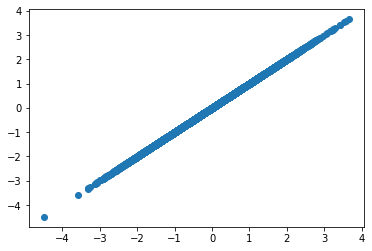

a = 0.7 일때 상관계수 : 	0.7064790982496317


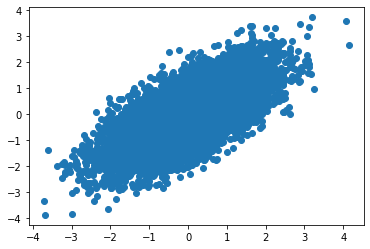

a = 0.3 일때 상관계수 : 	0.3038180401760577


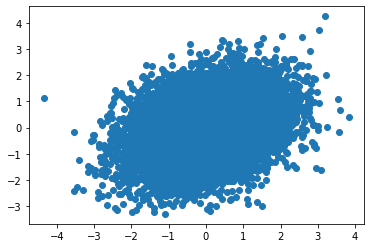

a = 0.01 일때 상관계수 : 	0.01173617593555061


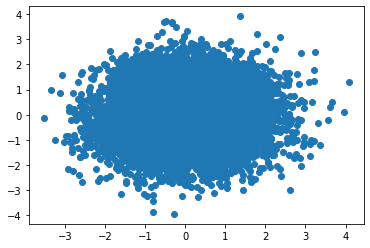

a = -0.3 일때 상관계수 : 	-0.30192207786100317


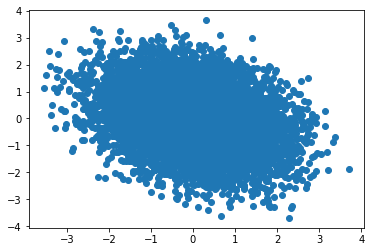

a = -0.7 일때 상관계수 : 	-0.7151342838441379


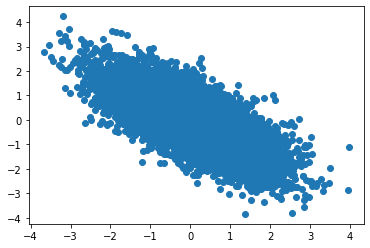

a = -1 일때 상관계수 : 	-1.0


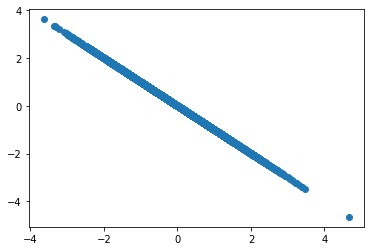

In [44]:
a = [1,0.7,0.3,0.01,-0.3,-0.7,-1]
for i in a:
    x, y = np.random.multivariate_normal([0, 0], [[1, i], [i, 1]], 10000).T
    plt.scatter(x,y)
    print(f"a = {i} 일때 상관계수 : ",Pearson(x,y), sep="\t")
    plt.show()

#### **예제 03. 표본 그리기 2**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
x.shape, y.shape
```


1. x 표본은 그대로 두고, y 표본에 `1, 0.7, 0.3, 0.01, -0.3, -0.7, -1`을 각각 곱해서 각 표본쌍의 스캐터 플롯 7개를 그리세요.
2. 7가지 경우에 대한 x, y 상관계수를 구하세요.


a = 1 일때 상관계수 : 	1.0


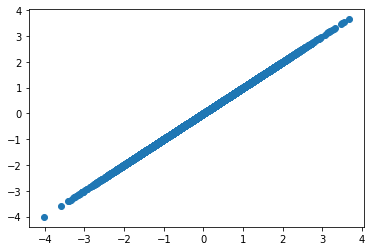

a = 0.7 일때 상관계수 : 	1.0


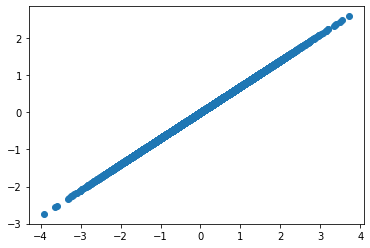

a = 0.3 일때 상관계수 : 	1.0


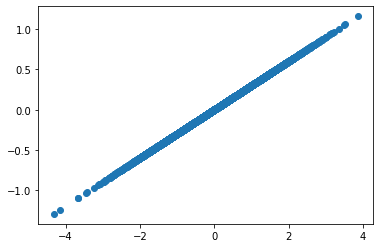

a = 0.01 일때 상관계수 : 	1.0


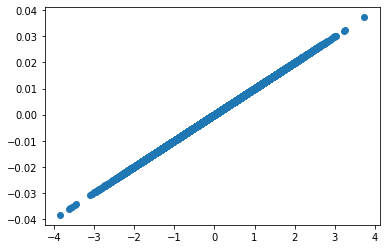

a = -0.3 일때 상관계수 : 	-1.0000000000000002


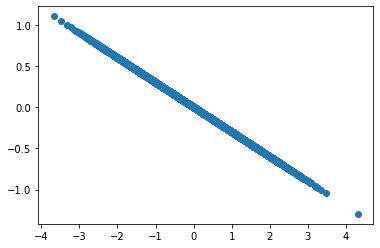

a = -0.7 일때 상관계수 : 	-1.0


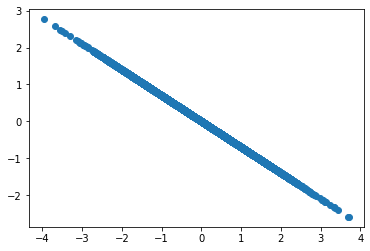

a = -1 일때 상관계수 : 	-1.0


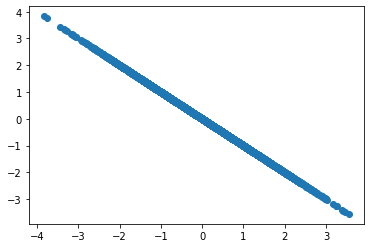

In [45]:
a = [1,0.7,0.3,0.01,-0.3,-0.7,-1]
for i in a:
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
    plt.scatter(x,y*i)
    print(f"a = {i} 일때 상관계수 : ",Pearson(x,y*i), sep="\t")
    plt.show()